# Neural & Behavioral Modeling - Week 4 (Exercises)
by Your Name (Your Email)

In [6]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Replicate exisiting findings/models 
Based on your personal interest, please choose and replicate ONE of the following studies:

1. <a href="http://ccl.northwestern.edu/netlogo/models/FlockingVeeFormations">Flocking Vee Formations</a> in NetLogo's [Sample Models::Biology] 

2. <a href="http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation">Wolf-Sheep Predation</a> in NetLogo's [Sample Models::Biology] 

3. <a href="https://www.wetalk.tw/thread-36278-1-1.html">MIT Matching Game</a>

4. Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). <a href="http://www.mpmlab.org/groups/">The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations</a>. Psychological Science, 25(4), 982-990.

5. Luhmann, C. C., & Rajaram, S. (2015). <a href="http://journals.sagepub.com/doi/abs/10.1177/0956797615605798">Memory transmission in small groups and large networks: An agent-based model</a>. Psychological Science, 26(12), 1909-1917.

In [7]:
random.randint(-1,2,2)

array([0, 0])

In [164]:
xy = random.randint(0, len(ones((50,50))), 2)

In [165]:
xy

array([ 3, 44])

In [261]:
# Write your codes here
initial_sheep = 50
initial_wolf = 50
grass_regrowth_time = 45 # 0 ~ 100
sz = 50

class sheep:
    def __init__(self, grid):
        grid_size=len(grid)
#         self.energy=10 # initial energy
        self.color = "#f3e9c0" # skin color
        self.growth = 8
        self.reproduce = 0.03
        self.energy = 50
        self.xy = random.randint(0, grid_size, 2)  # location
        
    def move(self, grid):
        grid_size=len(grid)
        self.xy += random.randint(-10,11,2) # stay or move to its neighboring locations
        self.xy=mod(self.xy,grid_size) # cyclic boundary
#         self.energy-=1 # energy decay

    def walk_eat_or_starve(self,grid):
        self.energy += 2
        grid_size=len(grid)
#         if(grid[self.xy[0],self.xy[1]]==1): # there is food
#             grid[self.xy[0],self.xy[1]]=0 # eat it!
#             self.energy+=10
#             if self.energy <= 0:

In [262]:
class wolf:
    def __init__(self,grid):
        grid_size=len(grid)
        self.color = "black" # skin color
        self.growth = 20
        self.reproduce = 0.06
        self.energy = 100
        self.xy = random.randint(0, grid_size, 2)  # location
        
    def move(self, grid):
        grid_size=len(grid)
        self.xy += random.randint(-10,11,2) # stay or move to its neighboring locations
        self.xy=mod(self.xy,grid_size) # cyclic boundary
#         self.energy-=1 # energy decay
    def walk_eat_or_starve(self,grid):
        grid_size=len(grid)
        self.energy -= 4
        for sheep_in in sheeps:
            if array_equal(sheep_in.xy,  self.xy):
                self.energy += 100
                sheeps.remove(sheep_in)
#                 print('remove')
#         if(grid[self.xy[0],self.xy[1]]==1): # there is food
#             grid[self.xy[0],self.xy[1]]=0 # eat it!
#             self.energy+=10
#         else:
#             self.energy-=8
#             if self.energy <= 0:

In [263]:
class grass:
    def __init__(self, grass_regrowth_time):
        self.grass_regrowth_time = grass_regrowth_time

In [264]:
def plot_world(grid, sheeps, wolves):
    sz=len(grid)
    clf() # clear previous figure
    spy(grid,alpha=0.1)
    for a in sheeps:
        offset=(random.rand(2)-1)/2 # adding some positional offsets to avoid overlapping of agents
        text(a.xy[1]+offset[1],a.xy[0]+offset[0],'♞',{'size':12,'color': a.color})
        #text(a.xy[1]+offset[1],a.xy[0]+offset[0],str(a.energy),{'size':12,'color':a.color})
    for a in wolves:
        offset=(random.rand(2)-1)/2 # adding some positional offsets to avoid overlapping of agents
        text(a.xy[1]+offset[1],a.xy[0]+offset[0],'☠',{'size':12,'color': a.color})
        #text(a.xy[1]+offset[1],a.xy[0]+offset[0],str(a.energy),{'size':12,'color':a.color})
#     title('Nalive='+str(len(agents)))
    axis('off')
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

KeyboardInterrupt: 

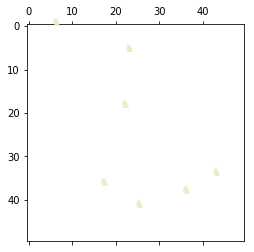

In [266]:
grid=ones((sz,sz)) # try eye(sz)
sheeps = [sheep(grid) for i in range(initial_sheep)] # assign each person to a location
wolves = [wolf(grid) for i in range(initial_wolf)]
sheep_number = len(sheeps)
wolf_number = len(wolves)

while(sheep_number>0 and wolf_number > 0): # Simulation stops when everyone dies
#     for person in people:
#         person.move(grid)
#         person.eat(grid)
#         if(person.energy>100):
#             people.append(Person(grid)) # reproduce
#             people[-1].xy=person.xy.copy() # easier to see the reproduction
#             person.energy-=50
#     Nalive=len(people)
#     people=[people[i] for i in range(Nalive) if people[i].energy>0] # some people died
    for sheep_inst in sheeps:
        sheep_inst.move(grid)
        sheep_inst.walk_eat_or_starve(grid)
        if sheep_inst.energy >= 100:
            sheeps.append(sheep(grid)) # reproduce
            sheeps[-1].xy=sheep_inst.xy.copy() # easier to see the reproduction
            sheep_inst.energy-=50
        elif sheep_inst.energy <= 0:
            sheeps.remove(sheep_inst)
    for wolf_inst in wolves:
        wolf_inst.move(grid)
        wolf_inst.walk_eat_or_starve(grid)
        if wolf_inst.energy >= 150:
            wolves.append(wolf(grid)) # reproduce
            wolves[-1].xy=wolf_inst.xy.copy() # easier to see the reproduction
            wolf_inst.energy-=50
        elif wolf_inst.energy <= 0:
            wolves.remove(wolf_inst)
    plot_world(grid, sheeps, wolves) # Plot new results
#     print('sheep:', len(sheeps), 'wolf:', len(wolves))
    #time.sleep(1)